# 3 ways to do dimensional reduction techniques in Scikit-learn

## Preamble and dataset

In [1]:
%matplotlib notebook
import mglearn
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
(X, y) = load_breast_cancer(return_X_y = True)
data = load_breast_cancer()

# Read the DataFrame, first using the feature data
df = pd.DataFrame(X, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['y'] = y

# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
print('df shape: {}'.format(df.shape))

df shape: (569, 31)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
print('%s: %.3f' % ('Logreg Train Accuracy', accuracy_score(y_train, clf.predict(X_train))))
print('%s: %.3f' % ('Logreg Test Accuracy', accuracy_score(y_test, clf.predict(X_test))))
print('%s: %.3f' % ('Logreg Train F1 Score', f1_score(y_train, clf.predict(X_train))))
print('%s: %.3f' % ('Logreg Test F1 Score', f1_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

Logreg Train Accuracy: 0.948
Logreg Test Accuracy: 0.944
Logreg Train F1 Score: 0.959
Logreg Test F1 Score: 0.955
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.98      0.93      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Principal Components Analysis (PCA)

#### Using PCA to find the first two principal components of the breast cancer dataset

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)  

pca = PCA(n_components=2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
print(X.shape, X_pca.shape)

(569, 30) (569, 2)


<IPython.core.display.Javascript object>


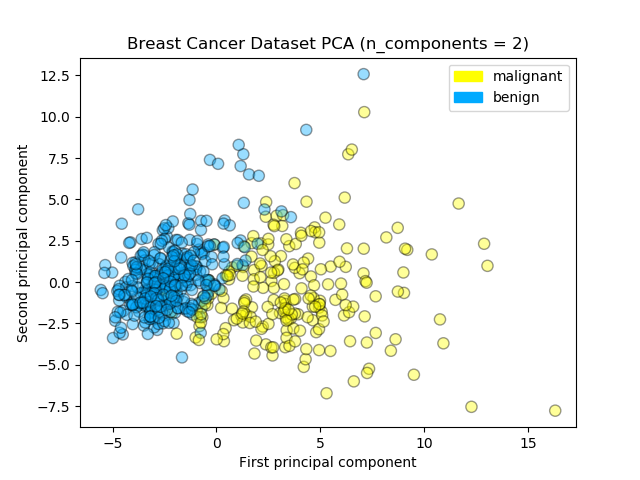

In [6]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y, ['malignant', 'benign'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

In [7]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, random_state=0)
clf_pca = LogisticRegression(random_state=0)
clf_pca.fit(X_train_pca, y_train)
print('%s: %.3f' % ('Logreg Train Accuracy', accuracy_score(y_train, clf_pca.predict(X_train_pca))))
print('%s: %.3f' % ('Logreg Test Accuracy', accuracy_score(y_test, clf_pca.predict(X_test_pca))))
print('%s: %.3f' % ('Logreg Train F1 Score', f1_score(y_train, clf_pca.predict(X_train_pca))))
print('%s: %.3f' % ('Logreg Test F1 Score', f1_score(y_test, clf_pca.predict(X_test_pca))))
print(classification_report(y_test, clf_pca.predict(X_test_pca)))

Logreg Train Accuracy: 0.962
Logreg Test Accuracy: 0.951
Logreg Train F1 Score: 0.970
Logreg Test F1 Score: 0.960
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        53
           1       0.99      0.93      0.96        90

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



<IPython.core.display.Javascript object>


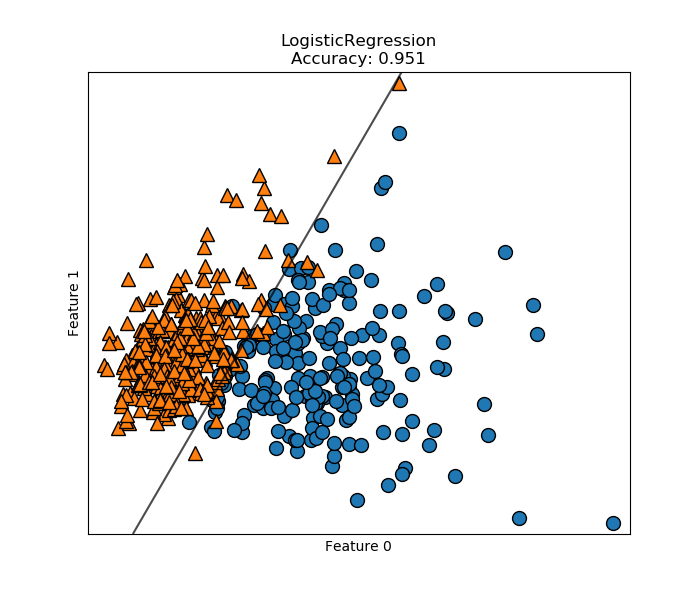

Text(0, 0.5, 'Feature 1')

In [8]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
mglearn.plots.plot_2d_separator(clf_pca, X_pca, fill=False, eps=0.5, ax=ax, alpha=.7)
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y, ax=ax)
ax.set_title("{}\nAccuracy: {:.3f}".format(clf_pca.__class__.__name__, accuracy_score(y_test, clf_pca.predict(X_test_pca))))
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

<IPython.core.display.Javascript object>


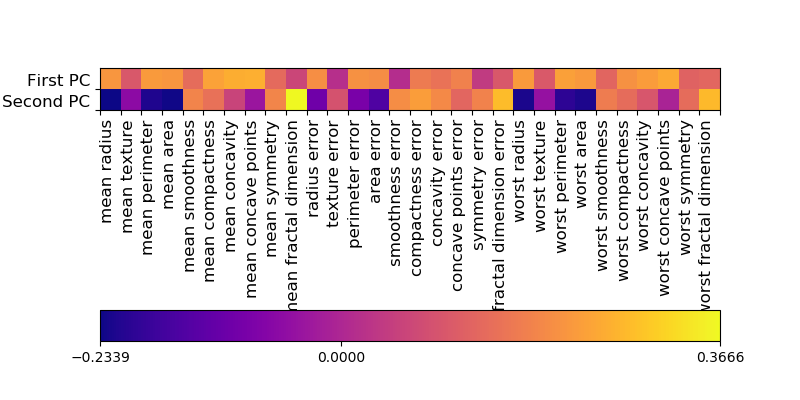

In [9]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(data.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

### Manifold learning methods

#### Multidimensional scaling (MDS) on the fruit dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)
mds = MDS(n_components = 2)
X_mds = mds.fit_transform(X_normalized)
print(X.shape, X_mds.shape)

(569, 30) (569, 2)


<IPython.core.display.Javascript object>


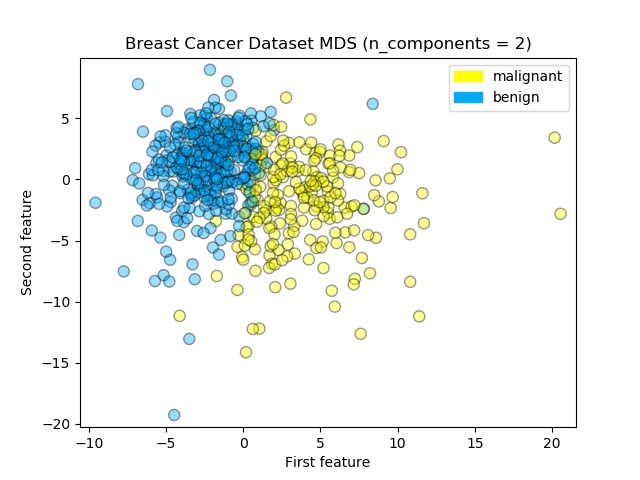

In [11]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y, ['malignant', 'benign'])

plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

In [12]:
X_train_mds, X_test_mds, y_train, y_test = train_test_split(X_mds, y, random_state=0)
clf_mds = LogisticRegression(random_state=0)
clf_mds.fit(X_train_mds, y_train)
print('%s: %.3f' % ('Logreg Train Accuracy', accuracy_score(y_train, clf_mds.predict(X_train_mds))))
print('%s: %.3f' % ('Logreg Test Accuracy', accuracy_score(y_test, clf_mds.predict(X_test_mds))))
print('%s: %.3f' % ('Logreg Train F1 Score', f1_score(y_train, clf_mds.predict(X_train_mds))))
print('%s: %.3f' % ('Logreg Test F1 Score', f1_score(y_test, clf_mds.predict(X_test_mds))))
print(classification_report(y_test, clf_mds.predict(X_test_mds)))

Logreg Train Accuracy: 0.960
Logreg Test Accuracy: 0.930
Logreg Train F1 Score: 0.968
Logreg Test F1 Score: 0.945
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        53
           1       0.93      0.96      0.95        90

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



<IPython.core.display.Javascript object>


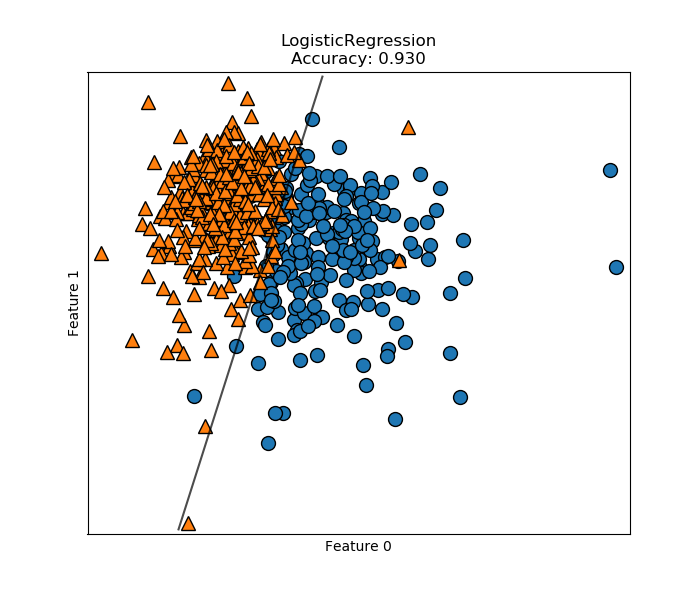

Text(0, 0.5, 'Feature 1')

In [13]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
mglearn.plots.plot_2d_separator(clf_mds, X_mds, fill=False, eps=0.5, ax=ax, alpha=.7)
mglearn.discrete_scatter(X_mds[:, 0], X_mds[:, 1], y, ax=ax)
ax.set_title("{}\nAccuracy: {:.3f}".format(clf_mds.__class__.__name__, accuracy_score(y_test, clf_mds.predict(X_test_mds))))
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

#### t-SNE on the breast cancer dataset

In [15]:
from sklearn.manifold import TSNE

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)
tsne = TSNE(random_state = 0)
X_tsne = tsne.fit_transform(X_normalized)
print(X.shape, X_tsne.shape)

(569, 30) (569, 2)


<IPython.core.display.Javascript object>


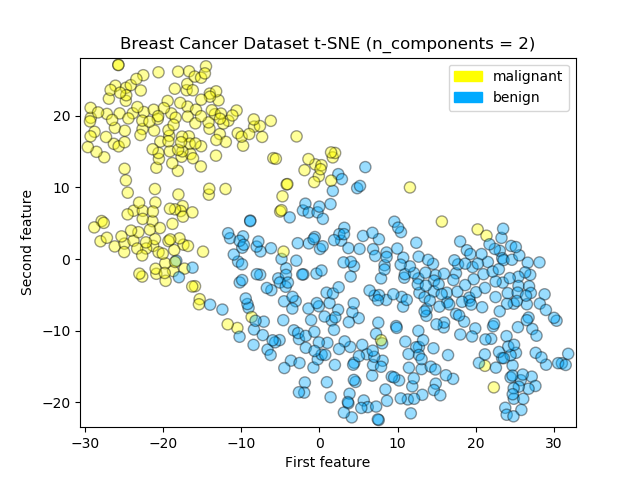

In [16]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_tsne, y, ['malignant', 'benign'])

plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('Breast Cancer Dataset t-SNE (n_components = 2)');

In [17]:
X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X_tsne, y, random_state=0)
clf_tsne = LogisticRegression(random_state=0)
clf_tsne.fit(X_train_tsne, y_train)
print('%s: %.3f' % ('Logreg Train Accuracy', accuracy_score(y_train, clf_tsne.predict(X_train_tsne))))
print('%s: %.3f' % ('Logreg Test Accuracy', accuracy_score(y_test, clf_tsne.predict(X_test_tsne))))
print('%s: %.3f' % ('Logreg Train F1 Score', f1_score(y_train, clf_tsne.predict(X_train_tsne))))
print('%s: %.3f' % ('Logreg Test F1 Score', f1_score(y_test, clf_tsne.predict(X_test_tsne))))
print(classification_report(y_test, clf_tsne.predict(X_test_tsne)))

Logreg Train Accuracy: 0.960
Logreg Test Accuracy: 0.930
Logreg Train F1 Score: 0.968
Logreg Test F1 Score: 0.944
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        53
           1       0.95      0.93      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



<IPython.core.display.Javascript object>


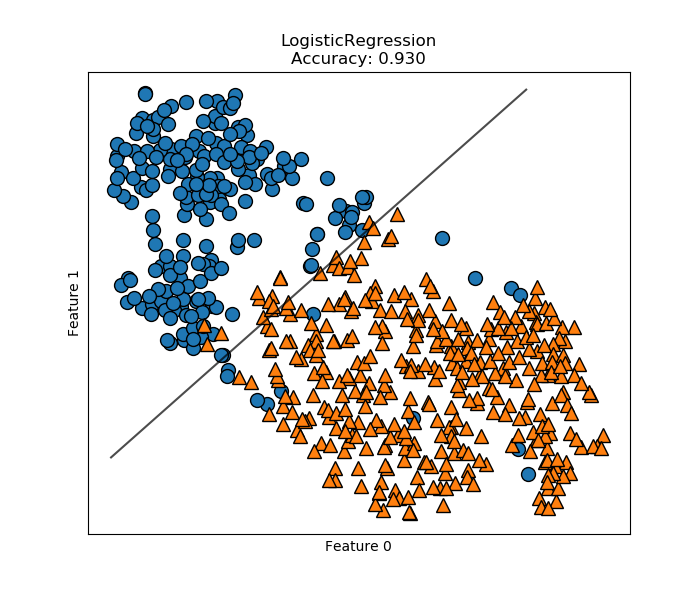

Text(0, 0.5, 'Feature 1')

In [18]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
mglearn.plots.plot_2d_separator(clf_tsne, X_tsne, fill=False, eps=0.5, ax=ax, alpha=.7)
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], y, ax=ax)
ax.set_title("{}\nAccuracy: {:.3f}".format(clf_tsne.__class__.__name__, accuracy_score(y_test, clf_tsne.predict(X_test_tsne))))
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")